In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

In [2]:
df = pd.read_csv('mushroom.csv')
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


#EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

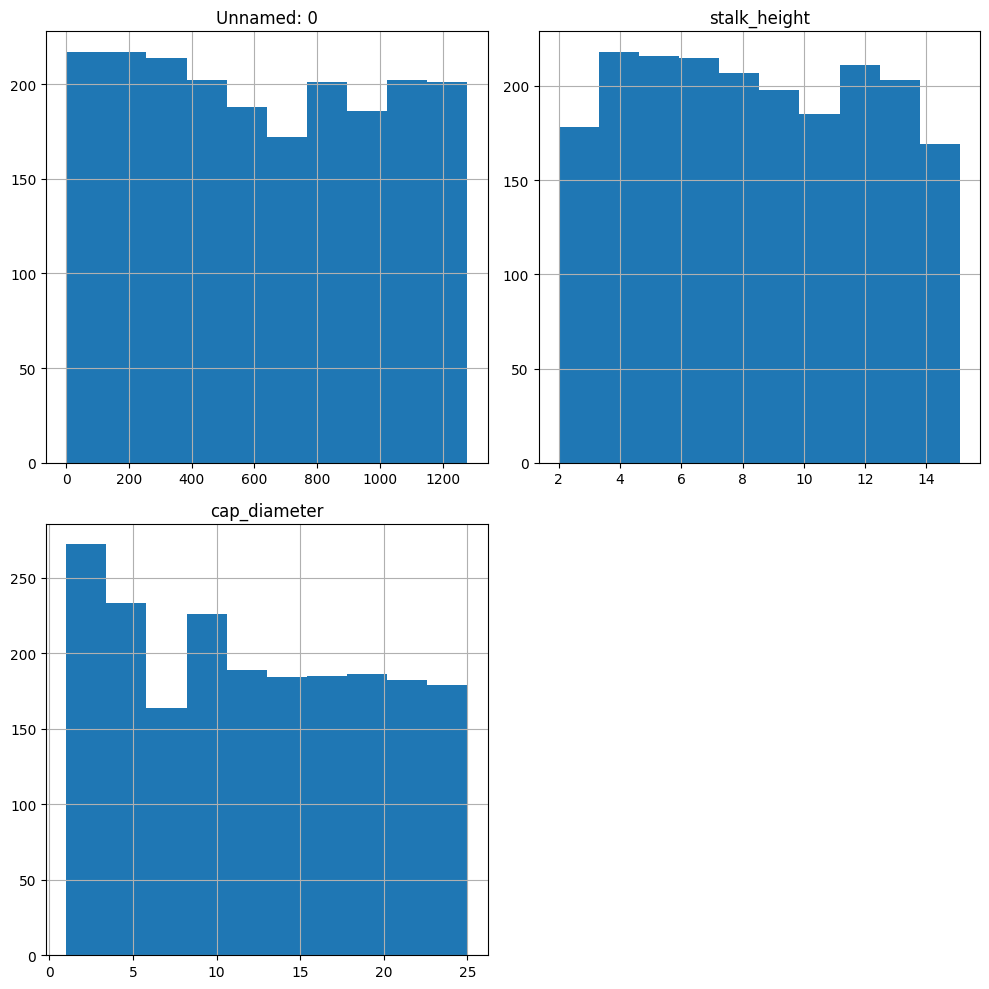

In [4]:
df.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

No outliers in numerical columns. most of the columns are categorical

#Data preprocessing

In [7]:
df.nunique()

,0
Unnamed: 0,976
cap_shape,5
cap_surface,4
cap_color,9
bruises,2
odor,9
gill_attachment,4
gill_spacing,3
gill_size,2
gill_color,12


In [5]:
df_encoded = df.drop('Unnamed: 0', axis=1)

In [6]:
scaler = StandardScaler()
numerical_features = ['stalk_height', 'cap_diameter']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

In [8]:
#Apply label encoding for columns with >2 values to reduce dimensionality
labelencoder = LabelEncoder()
columns_to_encode = df_encoded.drop(columns=[ 'stalk_height','cap_diameter'], axis=1).columns.tolist()

# Apply label encoding to each column individually
for column in columns_to_encode:
    df_encoded[column] = labelencoder.fit_transform(df_encoded[column])

In [10]:
df_encoded

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,1.576459,-1.030123
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,-1.216463,0.958407
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,0.163717,-0.724904
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,-0.871852,1.222967
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,1.511897,0.032765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4,2,0,1,4,0,1,1,3,1,...,0,1,1,2,6,0,1,1,-0.695623,0.730771
1996,4,2,5,1,5,0,2,1,9,1,...,0,2,1,7,8,2,5,1,-0.527090,0.168525
1997,2,1,3,1,3,3,0,1,7,1,...,0,0,2,1,8,0,6,1,1.382181,-0.148193
1998,0,3,7,0,7,2,0,1,6,0,...,1,3,1,0,1,5,6,1,0.715199,-0.552164


In [11]:
df_encoded.describe() #to check scale

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,...,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2.000000e+03
mean,2.052500,1.556000,3.862000,0.511500,3.988500,1.561500,1.00650,0.503500,5.348000,0.480000,...,0.5050,1.455500,0.990500,3.562000,3.905500,2.458000,3.070000,0.700000,2.131628e-16,-2.007283e-16
std,1.435888,1.114668,2.626672,0.499993,2.542361,1.126433,0.81902,0.500113,3.388752,0.499725,...,0.5001,1.117875,0.809776,2.294295,2.619351,1.732263,1.971559,0.458372,1.000250e+00,1.000250e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.744753e+00,-1.605536e+00
25%,1.000000,1.000000,2.000000,0.000000,2.000000,1.000000,0.00000,0.000000,2.000000,0.000000,...,0.0000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,-8.543991e-01,-9.352557e-01
50%,2.000000,2.000000,4.000000,1.000000,4.000000,2.000000,1.00000,1.000000,5.000000,0.000000,...,1.0000,2.000000,1.000000,4.000000,4.000000,2.000000,3.000000,1.000000,-3.531164e-02,-2.688250e-02
75%,3.000000,3.000000,6.000000,1.000000,6.000000,3.000000,2.00000,1.000000,8.000000,1.000000,...,1.0000,2.000000,2.000000,6.000000,6.000000,4.000000,5.000000,1.000000,9.014855e-01,9.059438e-01
max,4.000000,3.000000,8.000000,1.000000,8.000000,3.000000,2.00000,1.000000,11.000000,1.000000,...,1.0000,3.000000,2.000000,7.000000,8.000000,5.000000,6.000000,1.000000,1.798004e+00,1.800136e+00


In [12]:
x = df_encoded.drop('class', axis=1).values
y = df_encoded['class'].values

In [15]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [28]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1600, 24), (1600,), (400, 24), (400,))

#Data Visualization

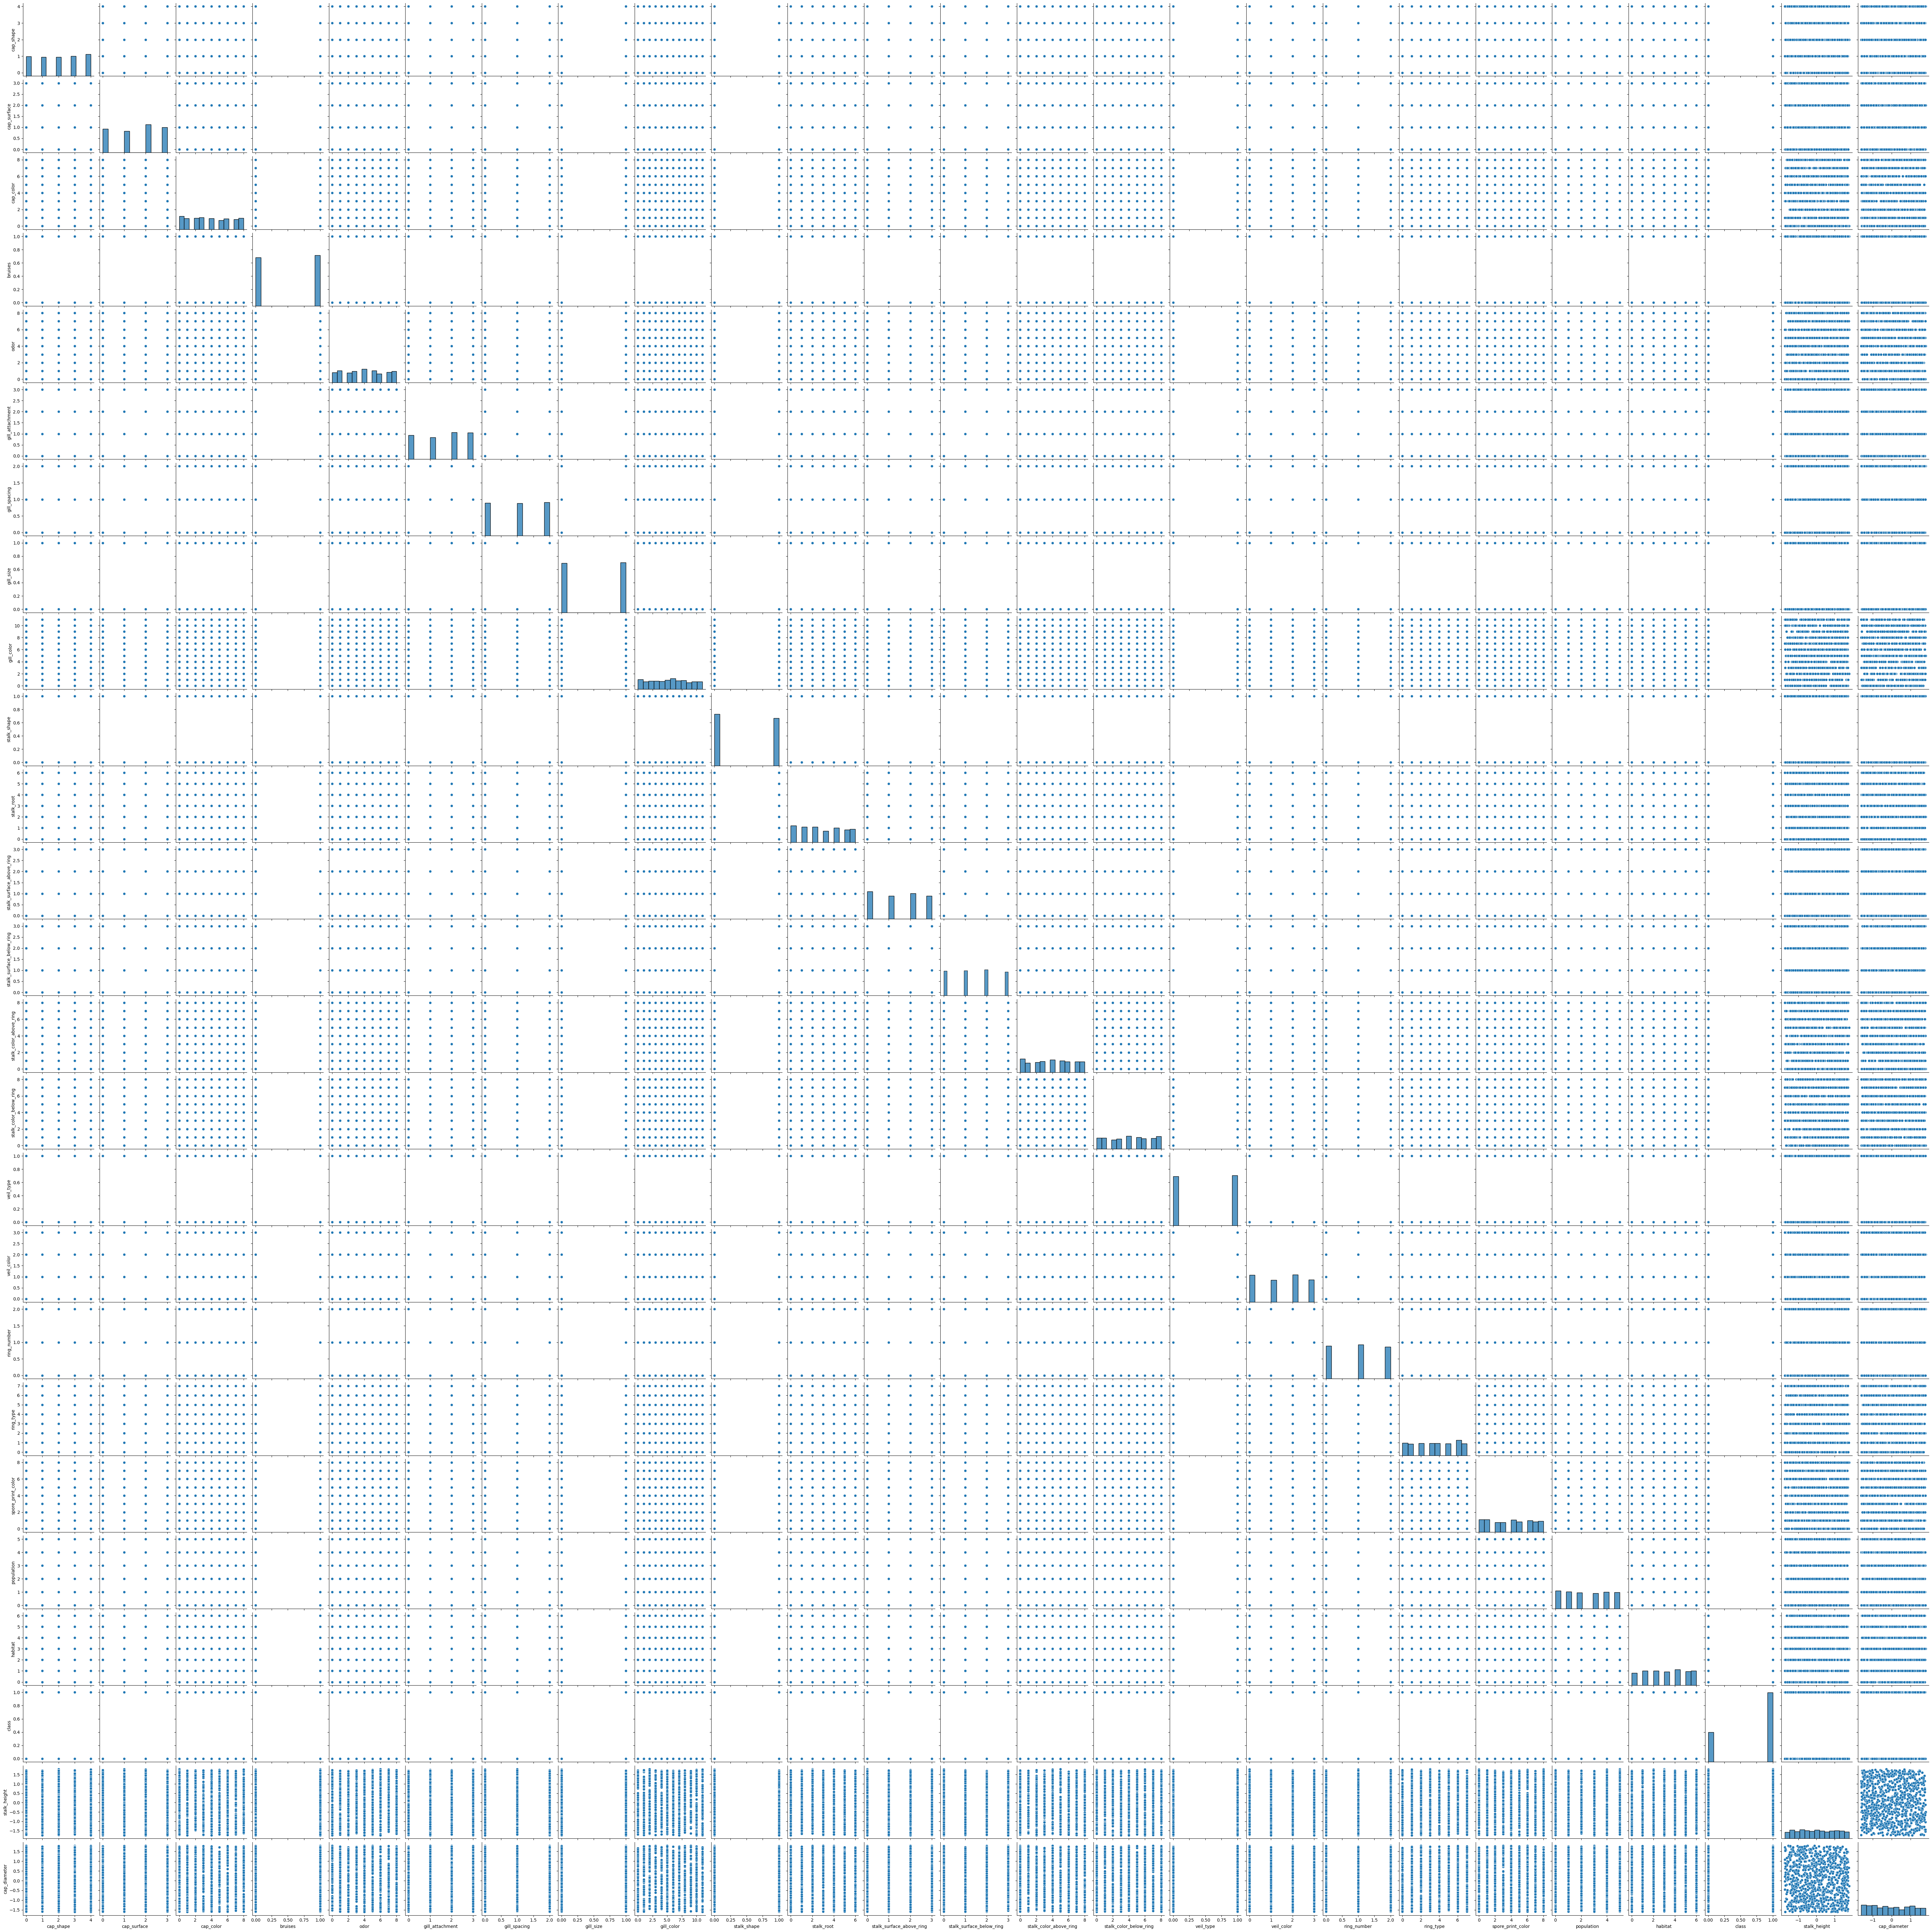

In [17]:
sns.pairplot(df_encoded)
plt.show()

Since data is label encoded it is hard to determine linear relationships

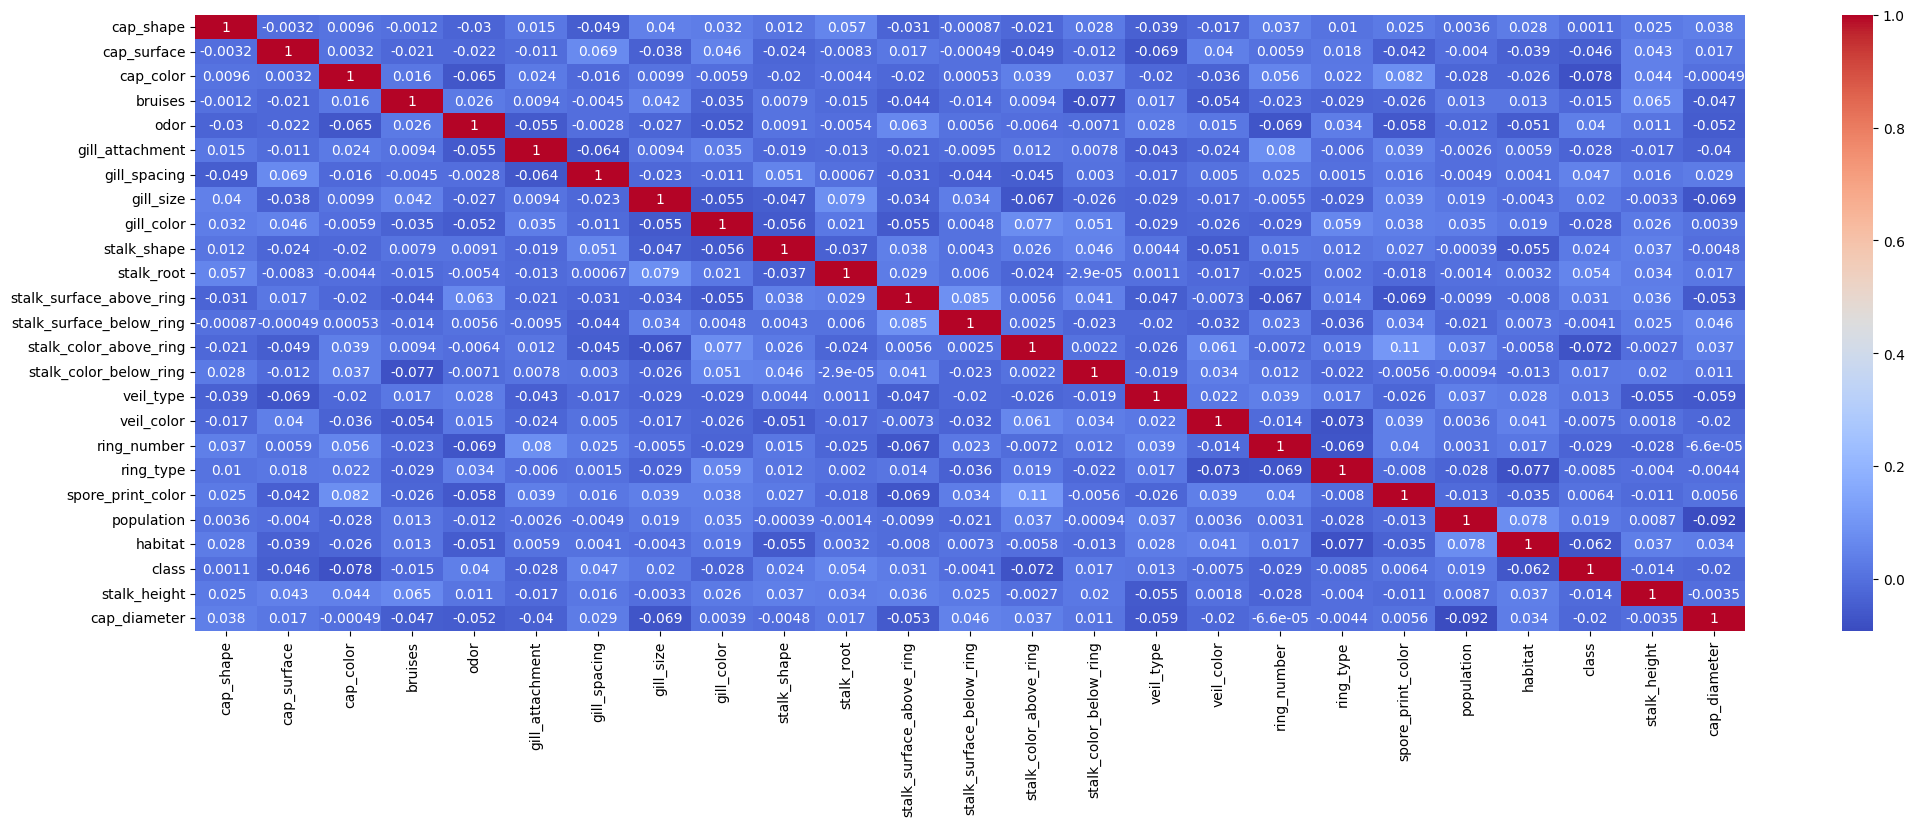

In [19]:
corr = df_encoded.corr()
plt.figure(figsize=(25, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

No significant relationships.

## Viewing class distributions

In [27]:
class_distribution = df_encoded['class'].value_counts()
print(class_distribution)

class
1    1400
0     600
Name: count, dtype: int64


In [25]:
mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))
print(mapping)

{'edible': 0, 'poisonous': 1}


data is unbalanced because more poisonous mushrooms are recorded compared to edible mushrooms.

#SVM

In [31]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [32]:
gsv.best_params_ , gsv.best_score_

({'C': 15, 'gamma': 50, 'kernel': 'rbf'}, 0.8625)

In [35]:
#Hyperparameter tuning and predicting on test dataset
clf = SVC(C= 15, gamma = 50, kernel='rbf')
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)

In [38]:
# Accuracy
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision =", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall =", recall)

# F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score =", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy = 89.25
Precision = 0.8672839506172839
Recall = 1.0
F1-score = 0.9289256198347108
Confusion Matrix:
[[ 76  43]
 [  0 281]]


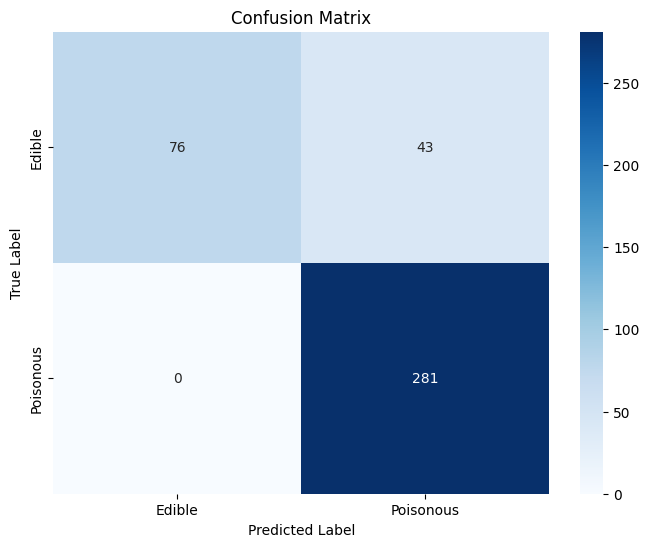

In [39]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Edible", "Poisonous"],
            yticklabels=["Edible", "Poisonous"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

This indicates that true negatives and true positives are being well-identified. Most of the predictions are correct.

Some instances where the mushroom is edible have been misclassified as posionous.

There are no instances where poisonous mushrooms have been misclassified as edible. This is good because it prevents accidental ingestion of truly poisonous mushrooms.


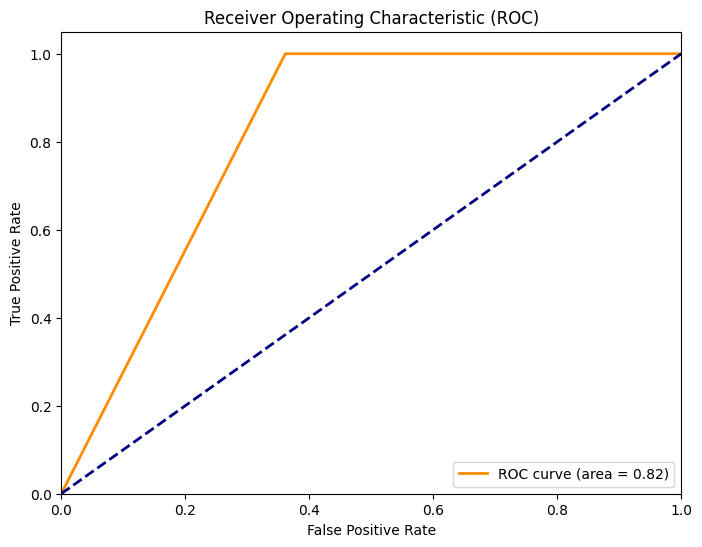

In [40]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()

#Comparison and Analysis

##Compare SVM performance with various kernels (linear, polynomial, radial basis function)

Kernel: linear [['linear', 0.7025, 0.7025, 1.0, 0.8252569750367107]]
Kernel: poly [['linear', 0.7025, 0.7025, 1.0, 0.8252569750367107], ['poly', 0.7275, 0.7443181818181818, 0.9323843416370107, 0.8278041074249605]]
Kernel: rbf [['linear', 0.7025, 0.7025, 1.0, 0.8252569750367107], ['poly', 0.7275, 0.7443181818181818, 0.9323843416370107, 0.8278041074249605], ['rbf', 0.715, 0.7135549872122762, 0.9928825622775801, 0.8303571428571429]]
         Kernel  Accuracy  Precision    Recall  F1-Score
0        linear    0.7025   0.702500  1.000000  0.825257
1          poly    0.7275   0.744318  0.932384  0.827804
2           rbf    0.7150   0.713555  0.992883  0.830357
3  Original SVM    0.8925   0.867000  1.000000  0.928000


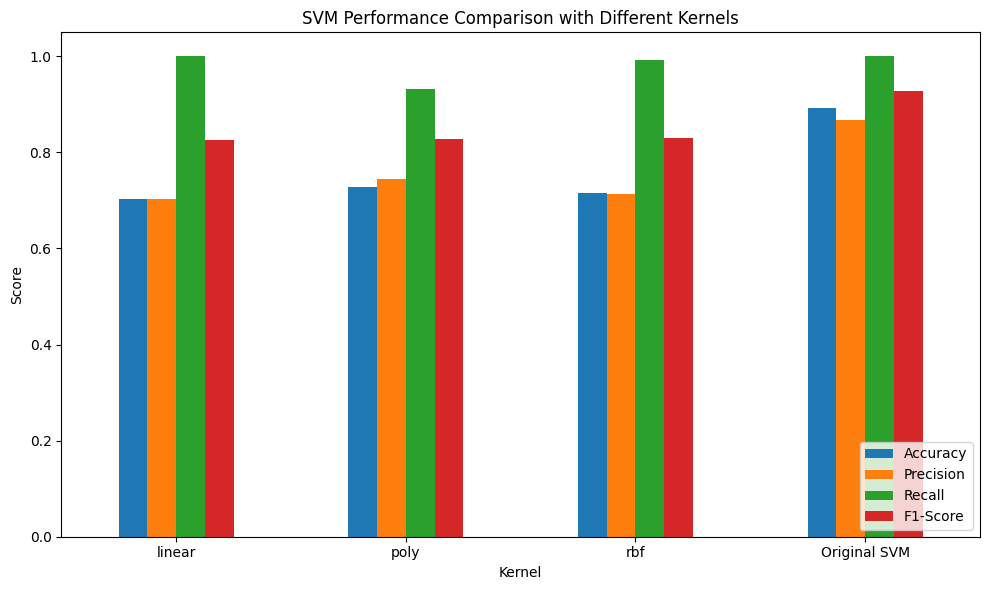

In [53]:
# Define a function to evaluate and compare kernels
def compare_kernels(X_train, y_train, X_test, y_test):

  kernels = ['linear', 'poly', 'rbf']
  results = []

  for kernel in kernels:
    # Create and train the SVM model
    clf = SVC(kernel=kernel)
    clf.fit(x_train, y_train)

    # Make predictions on the test set
    kernel_pred = clf.predict(x_test)

    # Calculate performance metrics
    kernel_accuracy = accuracy_score(y_test, kernel_pred)
    kernel_precision = precision_score(y_test, kernel_pred)
    kernel_recall = recall_score(y_test, kernel_pred)
    kernel_f1 = f1_score(y_test, kernel_pred)

    # Store the results
    results.append([kernel, kernel_accuracy, kernel_precision, kernel_recall, kernel_f1])
    print (f"Kernel: {kernel}", results)

  # Create a DataFrame from the results
  df_results = pd.DataFrame(results, columns=['Kernel', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
  return df_results

# Create a new row as a dictionary

original_model = {'Kernel': 'Original SVM',
           'Accuracy': 0.8925,
           'Precision': 0.867,
           'Recall': 1.0,
           'F1-Score': 0.928}


# Call the function to compare kernels
results_df = compare_kernels(x_train, y_train, x_test, y_test)
results_df = pd.concat([results_df, pd.DataFrame([original_model])], ignore_index=True)

# Display the results
print(results_df)

# Optionally, you can visualize the results using a bar plot
results_df.plot(x='Kernel', y=['Accuracy', 'Precision', 'Recall', 'F1-Score'], kind='bar', figsize=(10, 6))
plt.title('SVM Performance Comparison with Different Kernels')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

The original model we made (kernel rbf) performs better than the other kernels

##Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA nad visualization results

### **SVM Strengths for the Mushroom Dataset**

High Accuracy:

My results show that SVM with an RBF kernel achieved high accuracy (around 89-90%). This indicates that SVM is capable of learning the complex relationships in the dataset and making accurate predictions.


Effective in High-Dimensional Spaces:


The Mushroom dataset has several features after encoding. SVM generally performs well in high-dimensional spaces, which is suitable for this dataset.

Robust to Outliers:


My EDA indicated that there are no significant outliers in the numerical columns. While SVM is generally robust to outliers, the lack of them in this dataset further supports its effectiveness.

Handles Non-linear Relationships:

Although my correlation heatmap didn't show strong linear relationships, the RBF kernel in SVM can capture non-linear relationships. This is crucial for the Mushroom dataset where the decision boundaries are likely to be complex.


### **SVM Weaknesses for the Mushroom Dataset:**


Interpretability:

SVM models, especially with non-linear kernels, can be difficult to interpret. I find it challenging to understand the relationship between features and predictions.

Sensitivity to Feature Scaling:

SVM performance can be affected by the scale of features. Although I applied StandardScaler to numerical features, the categorical features were label encoded. This might introduce a bias if the label encoding doesn't represent the true relationships between categories.

Computational Cost for Large Datasets:

 While the Mushroom dataset is not particularly large, it's worth noting that SVM can become computationally expensive for very large datasets, especially during the hyperparameter tuning process.

Unbalanced Data:

 My EDA highlighted an imbalance in class distribution (more poisonous than edible mushrooms). SVM can be sensitive to class imbalance, potentially leading to biased predictions toward the majority class. I might need to consider techniques like oversampling or using different evaluation metrics to address this issue.


##Discuss practical implications of SVM in real-world classification tasks.

###Real-World Applications:

Image Recognition: Object detection, facial recognition, medical image analysis.

Text Classification: Spam filtering, sentiment analysis, document categorization.

Bioinformatics: Protein classification, gene expression analysis, disease prediction.

Finance: Stock market prediction, credit risk assessment, fraud detection.

Other: Handwriting recognition, speech recognition, intrusion detection.


###Strengths:

Handles high-dimensional data.

Robust to noise and outliers.

Models non-linear relationships.

Good generalization performance.


###Limitations:

Computationally expensive for large datasets.

High memory requirements.

Limited interpretability.

Sensitive to parameter tuning.